<a href="https://colab.research.google.com/github/PhamDucThinh1995/Test-Time-Augmentation/blob/main/Test_Time_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10, mnist, fashion_mnist
from keras.preprocessing import image
from keras.layers import Conv2D, Dense, Input, Flatten, Dropout
from keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import optimizers
import keras
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

In [2]:
# (x_train, y_train), (x_val, y_val) = cifar10.load_data()
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
y_train.sum()

225000

In [4]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
x_train, x_val = x_train.astype('float32')/255.,  x_val.astype('float32')/255. #Normalize step
y_train, y_val = to_categorical(y_train), to_categorical(y_val)

In [6]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='reflect',
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [9]:
train_datagen.fit(x_train)

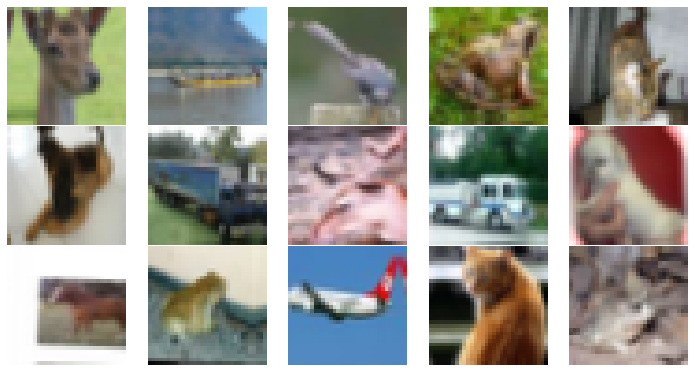

In [10]:
plt.figure(figsize=(10,5))

for X_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=15):
  for i in range(0,15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_batch[i].reshape(32,32,3),cmap=plt.get_cmap('gray'))
    plt.axis('off')
  plt.tight_layout(pad=0.1)
  plt.show()
  break


In [11]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 86528)             0         
                                                                 
 dense (Dense)               (None, 256)               22151424  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               3

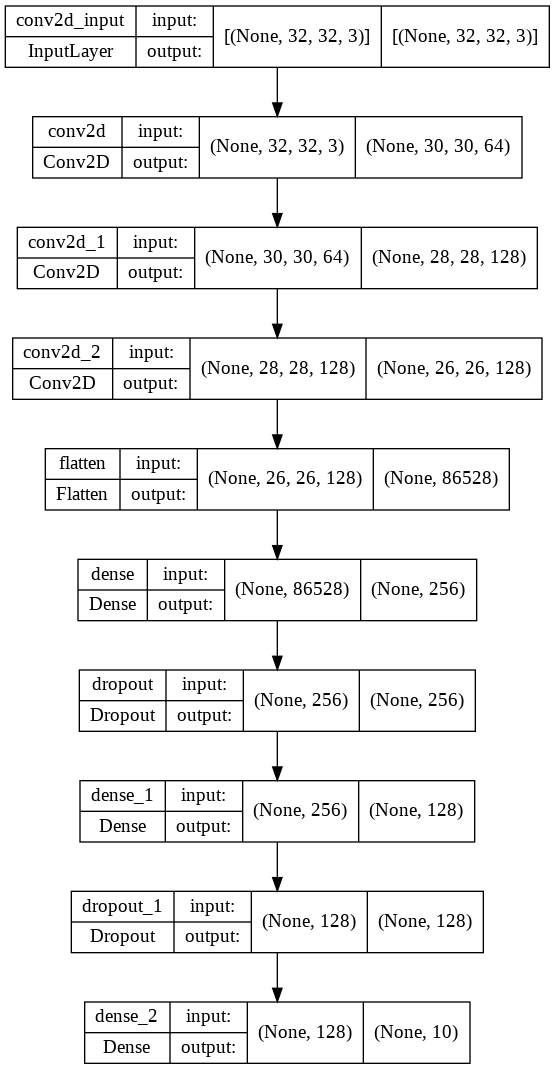

In [31]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
bs = 64
epochs = 15

In [14]:
history = model.fit_generator(train_datagen.flow(x_train, y_train,
                              batch_size=bs),
                              epochs=epochs,
                              steps_per_epoch=len(x_train)/bs,
                              validation_data=(x_val, y_val))

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


781/781 [==============================] - 43s 39ms/step - loss: 2.3246 - accuracy: 0.1462 - val_loss: 2.1771 - val_accuracy: 0.1745
Epoch 2/15
781/781 [==============================] - 33s 42ms/step - loss: 2.1937 - accuracy: 0.1802 - val_loss: 2.0217 - val_accuracy: 0.2701
Epoch 3/15
781/781 [==============================] - 31s 39ms/step - loss: 2.1636 - accuracy: 0.1951 - val_loss: 2.1258 - val_accuracy: 0.2174
Epoch 4/15
781/781 [==============================] - 32s 41ms/step - loss: 2.1248 - accuracy: 0.2225 - val_loss: 1.9875 - val_accuracy: 0.2762
Epoch 5/15
781/781 [==============================] - 31s 39ms/step - loss: 2.1180 - accuracy: 0.2131 - val_loss: 2.1613 - val_accuracy: 0.2053
Epoch 6/15
781/781 [==============================] - 32s 41ms/step - loss: 2.0733 - accuracy: 0.2395 - val_loss: 1.9641 - val_accuracy: 0.3126
Epoch 7/15
781/781 [==============================] - 32s 41ms/step - loss: 2.0179 - accuracy: 0.2605 - val_loss: 1.9950 - val_accuracy: 0.2784
Epo

In [15]:
print(f'Baseline accuracy: {model.evaluate(x_val, y_val)[1]}')

313/313 [==============================] - 2s 5ms/step - loss: 1.7829 - accuracy: 0.3636
Baseline accuracy: 0.3635999858379364


Test Image Generator

In [16]:
tta_steps = 10

In [17]:
test_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='reflect', 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [18]:
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(test_datagen.flow(x_val, batch_size=bs,
                                                      shuffle=False), steps = len(x_val)/bs)
    predictions.append(preds)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """
100%|██████████| 10/10 [00:45<00:00,  4.53s/it]


In [30]:
model.__dir__()

['_self_setattr_tracking',
 '_is_model_for_instrumentation',
 '_instrumented_keras_api',
 '_instrumented_keras_layer_class',
 '_instrumented_keras_model_class',
 '_trainable',
 '_stateful',
 'built',
 '_input_spec',
 '_build_input_shape',
 '_saved_model_inputs_spec',
 '_saved_model_arg_spec',
 '_supports_masking',
 '_name',
 '_activity_regularizer',
 '_trainable_weights',
 '_non_trainable_weights',
 '_updates',
 '_thread_local',
 '_callable_losses',
 '_losses',
 '_metrics',
 '_metrics_lock',
 '_dtype_policy',
 '_compute_dtype_object',
 '_autocast',
 '_self_tracked_trackables',
 '_inbound_nodes_value',
 '_outbound_nodes_value',
 '_expects_training_arg',
 '_default_training_arg',
 '_expects_mask_arg',
 '_dynamic',
 '_initial_weights',
 '_auto_track_sub_layers',
 '_preserve_input_structure_in_config',
 '_outer_name_scope',
 '_is_graph_network',
 'inputs',
 'outputs',
 'input_names',
 'output_names',
 '_compute_output_and_mask_jointly',
 '_distribution_strategy',
 '_cluster_coordinator',
 

In [28]:
len(predictions)

10

In [19]:
final_pred = np.mean(predictions, axis=0)

In [32]:
predictions[9].shape

(10000, 10)

In [21]:
final_pred.shape

(10000, 10)

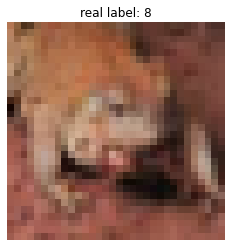

In [34]:
for i  in range(6):
  test_image = x_val[i]
  plt.imshow(test_image)
  plt.title(f'real label: {np.argmax(y_val[image_ix])}')
  plt.axis('off');

In [33]:
x_val.shape

(10000, 32, 32, 3)

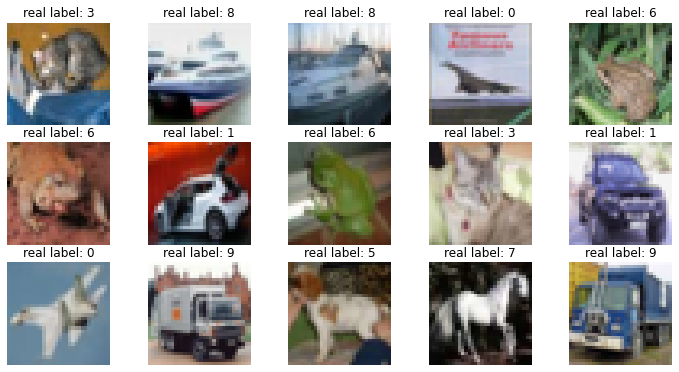

SyntaxError: ignored

In [36]:
plt.figure(figsize=(10,5))

for i in range(0,15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_val[i].reshape(32,32,3),cmap=plt.get_cmap('gray'))
  plt.title(f'real label: {np.argmax(y_val[i])}')
  plt.axis('off')
plt.tight_layout(pad=0.1)
plt.show()
break